In [81]:
import numpy as np

x = np.array(([3, 5], [5, 1], [10, 2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

X = x / np.amax(x, axis=0)
Y = y / 100


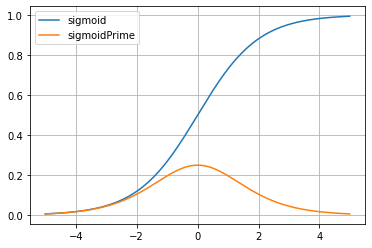

In [82]:
# input matrix size = 3 x 2
# [[0.3, 1. ],
# [0.5, 0.2],
# [1. , 0.4]]

# output matrix size = 3 x 1
# [[0.75],
# [0.82],
# [0.93]]

# Equation for 3 layer ( input, 1 hidden, output )
# [3,  5]                        [ 3w¹11 + 5w¹21,  3w¹12 + 5w¹22,  3w¹13 + 5w¹23]
# [5,  1] x [w¹11, w¹12, w¹13] = [ 5w¹11 + 1w¹21,  5w¹12 + 1w¹22,  5w¹13 + 1w¹23]
# [10, 2]   [w¹21, w¹22, w¹23]   [10w¹11 + 2w¹21, 10w¹12 + 2w¹22, 10w¹13 + 2w¹23]
# X(inputs)  W¹(weights)          Z²(second/hidden layer) (3 x 3)

# Z² = X * W¹               .... (1)
# a² = f(XW¹)               .... (2)

# (3x1) = [3x3]*[3*1]
# Z³ = a² * W²              .... (3)
# ŷ = f(Z³)                 .... (4) [ f is sigmoid fun]

# synapse, x1 = input * weight (ex: 3w¹11)
# synapse only multiplies
# neurons add all multiplied values
# neurons, Σx = x1 + x2 + x3 (ex: [3w¹11 + 5w¹21])
# neurons activation, a = 1/(1+e^-z)

## Cost function
# (how wrong or costly our model is)
# Training network = minimizing cost function
# our cost = inputs and weights on synapses

# j = Σ 1/2 * (y-ŷ)²        .... (5)
# [the smaller the better]

# j = Σ 1/2 * (y - f( f(XW¹) * W² ) )²
# how j changes when w changes?

# dj/dw is + or - ? 
# positive means going uphill, negative means downhill
# rate of change of j compared to w

# winner dj/dw = 0
# disadvantage: non-convex, local minimum, global minimum
# Solution : stochastic gradient descent, calculate one weight at a time

# math for dj/dw
# W = W¹, W² [we have two weights, W¹=3x3 & W²=1x3]
# so dj/dW¹=3x3 & dj/dW²=1x3

# For dj/dW²,

# dj/dW² = d Σ 1/2 * (y-ŷ)² / dW²
# we know, d/dx(u+v) = du/dx + dv/dx
# ex: d/dx(3x+2x²) = 3 + 4x [ sum rule in differenciation ]

# for a single item,
# dj/dW² = 2 * 1/2 * (y-ŷ) [power rule]
# dj/dW² = (y-ŷ) * d/dW²(y-ŷ)

# (fog)' = (f'og) * g'
# ex: d/dx (3x+2x²)² = 2*(3x+2x²) (3+4x) 

# dj/dW² = (y-ŷ) * (0 - dŷ/dW²)
# dj/dW² = -(y-ŷ) * dŷ/dW²
# dj/dW² = -(y-ŷ) * dŷ/dZ³ * dZ³/dW²

# dz/dx = dz/dy * dy/dx [multiplication chain rule]

# we need to diffenciate sigmoid function respect to Z³
# F(Z) = 1/1+e^-z ( let, 1 = u, 1+e^-z = v)
# F(Z)' = u'v - uv' / v²
# F(Z)' = 0*v - {1 * (0 + -e^-z)} / (1+e^-z)^²
# F(Z)' = e^-z / (1+e^-z)² ... (6)

# dj/dW² = -(y-ŷ) *f'(Z³)' * dZ³/dW²
# dj/dW² = d³ * a²
# [ here, Z³ = a² * W² & d³ = -(y-ŷ) *f'(Z³)' ]
#
# Now for first layer
# dj/dW¹ = -(y-ŷ) *f'(Z³)' * dZ³/dW¹
# dj/dW¹ = d³ * dZ³/da² * da²/dW¹ [ d³ = -(y-ŷ) *f'(Z³)' ]
# dj/dW¹ = d³ * (W²[T]) * da²/dW¹ [t = transport]
# dj/dW¹ = d³ * (W²[T]) * da²/dZ² * dZ²/dW¹
# dj/dW¹ = d³ * (W²[T]) * f'(Z²) * dZ²/dW¹
# dj/dW¹ = d³ * (W²[T]) * f'(Z²) * X[T]
# dj/dW¹ = X[T] * d² 
# here, d² = d³ * (W²[T]) * f'(Z²) 

def sigmoid( z):
    return 1 / (1 + np.exp(-z))
def sigmoidPrime(z):
    # derivative of sigmoid function 
    return np.exp(-z)/((1 + np.exp(-z))**2)

testValues = np.arange(-5,5,0.01)
from matplotlib import pyplot as plt

plt.plot(testValues, sigmoid(testValues))
plt.plot(testValues, sigmoidPrime(testValues))
plt.grid(1)
plt.legend(['sigmoid','sigmoidPrime'])

In [83]:
class Neural_Netowrk(object):
    def __init__(self):
        # Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3

        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    # propagates input through network
    def forward(self, X):
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    # Apply sigmoid activation function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoidPrime(self, z):
        # derivative of sigmoid function
        return np.exp(-z) / ((1 + np.exp(-z)) ** 2)

    def costFunction(self, X, y):
        # compute cost fir given xy. use weights already stored in class
        self.yHat = self.forward(X)
        # j = Σ 1/2 * (y-ŷ)²
        j = 0.5 * sum((y - self.yHat) ** 2)
        return j

    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        # d³ = -(y-ŷ) *f'(Z³)'
        delta3 = np.multiply(-(y - self.yHat), self.sigmoidPrime(self.z3))
        # dj/dW² = d³ * a²
        djdW2 = np.dot(self.a2, delta3)
        # d² = d³ * (W²[T]) * f'(Z²)
        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        # dj/dW¹ = X[T] * d²
        djdW1 = np.dot(X.T, delta2)
        return djdW1, djdW2


In [84]:
NN = Neural_Netowrk()

In [85]:
cost1 = NN.costFunction(X,y)

In [86]:
djdW1, djdW2 = NN.costFunctionPrime(X,y)

In [87]:
djdW1, djdW2

(array([[2.50550815, 6.94737445, 4.96441656],
        [2.04134073, 6.70039783, 3.96781186]]),
 array([[-13.97486481],
        [-21.36781953],
        [-21.264681  ]]))

In [88]:
scalar = 3
NN.w1 = NN.W1 + scalar * djdW1
NN.w2 = NN.W2 + scalar * djdW2
cost2 = NN.costFunction(X, y)

In [89]:
print(cost1, cost2)

[10442.6774408] [10442.6774408]


In [90]:
djdW1, djdW2 = NN.costFunctionPrime(X,y)

NN.W1 = NN.W1 - scalar * djdW1
NN.W2 = NN.W2 - scalar * djdW2

In [91]:
cost3 = NN.costFunction(X, y)

In [92]:
print(cost2, cost3)

[10442.6774408] [10370.93953235]
